<a href="https://colab.research.google.com/github/Erfan-ram/Deep-ML-Doc/blob/main/redwine-DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/MyDrive/red-wine.csv')

X = dataset.copy()
# Remove target
y = X.pop('quality')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
)

X = preprocessor.fit_transform(X)
y = 1/(1 + np.exp(-y))# log transform target instead of standardizing

trainx, testx ,trainy , testy = model_selection.train_test_split(
    X,y, test_size=0.33, random_state=1)

In [26]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [27]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


we implement a layer with combine some units:

![Layer](https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png)

and you may asking what is **Activation function** and what it does ?

A rectified linear unit `(ReLU)` is an activation function that introduces the property of non-linearity to a deep learning model and `solves the vanishing gradients issue`. "It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning.

![relu](https://storage.googleapis.com/kaggle-media/learn/images/OLSUEYT.png)

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Input((11,)),
    layers.Dense(units=512, activation='relu'),
    # layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    # layers.BatchNormalization(),
    # the linear output layer
    layers.Dense(units=1),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               6144      
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 137,729
Trainable params: 137,729
Non-trainable params: 0
_________________________________________________________________


now we are gonna see how would out code compile and fit model :

![fit model](https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif)

The `loss function` measures the disparity between the the target's true value and the value the model predicts.

batch size = x `inputs casses` would train on model on eatch iterations

epoch = itterations to decreas cost function ( J )

`all inputs / epochs` = batch size (samples would train on each itterations or epochs )

Learning Rate = according to the mount of it , it tooks longer or smaller step to learn from samples .

`Adam optimizer `is a way to boost Learning rate intuition .



#Add Loss and Optimizer

Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

In [38]:
from keras.api._v2.keras import metrics
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss= 'mae',
    )

# model.compile(optimizer='Adam',
      #  loss= 'mae')

#Train Model
Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

In [39]:
history = model.fit(
    x=trainx,
    y=trainy,
    validation_data=(testx,testy),
    batch_size=128,
    epochs=30
)

Epoch 1/30
9/9 [==============================] - 1s 19ms/step - loss: 0.4359 - val_loss: 0.2642
Epoch 2/30
9/9 [==============================] - 0s 6ms/step - loss: 0.2394 - val_loss: 0.2207
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 0.1964 - val_loss: 0.1875
Epoch 4/30
9/9 [==============================] - 0s 6ms/step - loss: 0.1660 - val_loss: 0.1603
Epoch 5/30
9/9 [==============================] - 0s 7ms/step - loss: 0.1455 - val_loss: 0.1433
Epoch 6/30
9/9 [==============================] - 0s 8ms/step - loss: 0.1230 - val_loss: 0.1284
Epoch 7/30
9/9 [==============================] - 0s 6ms/step - loss: 0.1070 - val_loss: 0.1153
Epoch 8/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0919 - val_loss: 0.1030
Epoch 9/30
9/9 [==============================] - 0s 7ms/step - loss: 0.0825 - val_loss: 0.0965
Epoch 10/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0701 - val_loss: 0.0871
Epoch 11/30
9/9 [=====================

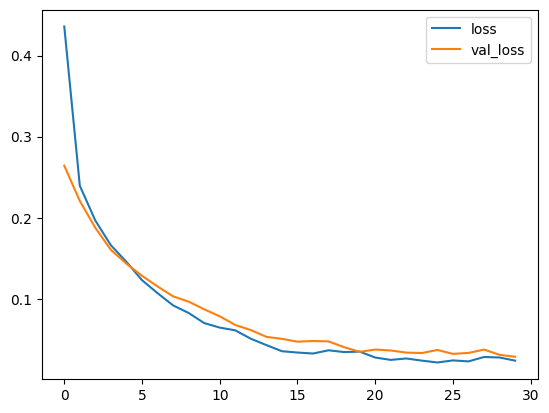

In [40]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[:, ['loss','val_loss']].plot();

In [33]:
model.evaluate(testx,testy)

17/17 [==============================] - 0s 3ms/step - loss: 0.0989


0.09889968484640121

In [41]:
model.evaluate(testx,testy)

17/17 [==============================] - 0s 6ms/step - loss: 0.0286


0.02856377884745598